# Validation of Experiment 8

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
from pathlib import Path
SCRIPT_DIR = os.path.dirname(os.path.abspath("__init__.py"))
SRC_DIR = Path(SCRIPT_DIR).parent.absolute()

In [4]:
from src.experiments_evaluation.experiment_data_puller import get_experiment_metrics
from src.experiments_evaluation.plotting import visualize_errors_as_function_of_percentage

In [5]:
EXP_NAME = "ex8_emc_nineties"


In [6]:
RUN_NAME = "emc_nineties"
PERCENTAGES = ["92", "94", "96", "98"]

In [7]:
metrics = get_experiment_metrics(EXP_NAME)
metrics_ex5_1 = get_experiment_metrics("ex5.1_elev_mov_cmi")

Experiment 'ex8_emc_nineties' found!
Run name: emc_nineties_94p
Run name: emc_nineties_96p
Run name: emc_nineties_92p
Run name: emc_nineties_98p
Experiment 'ex5.1_elev_mov_cmi' found!
Run name: elev_mov_cmi_70p
Run name: elev_mov_cmi_40p
Run name: elev_mov_cmi_90p
Run name: elev_mov_cmi_10p
Run name: elev_mov_cmi_50p
Run name: elev_mov_cmi_60p
Run name: elev_mov_cmi_20p
Run name: elev_mov_cmi_80p
Run name: elev_mov_cmi_99p
Run name: elev_mov_cmi_30p


In [8]:
runs = [f'{RUN_NAME}_{p}p' for p in PERCENTAGES]

In [9]:
extended_metrics = metrics
extended_metrics['elev_mov_cmi_90p'] = metrics_ex5_1['elev_mov_cmi_90p']
extended_metrics['elev_mov_cmi_99p'] = metrics_ex5_1['elev_mov_cmi_99p']

runs.insert(0, 'elev_mov_cmi_90p')
runs.append('elev_mov_cmi_99p')

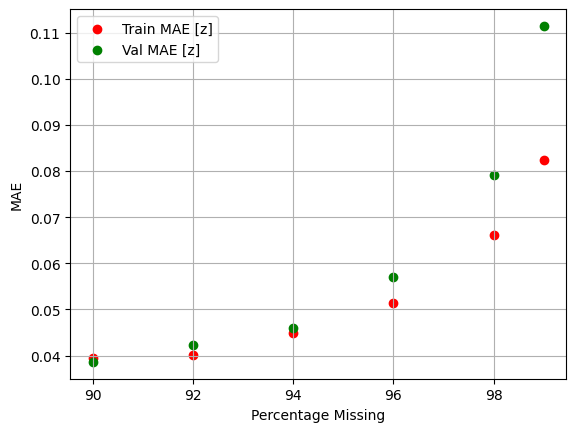

In [10]:
# TODO: Describe x and y axis!
visualize_errors_as_function_of_percentage(runs, extended_metrics,
                                           percentages=[90, 92, 94, 96, 98, 99],
                                           save_file_name=None)

In [11]:
extended_metrics

{'emc_nineties_94p': {'loss': [0.07442761957645416,
   0.04557903856039047,
   0.04543111100792885,
   0.04452966898679733,
   0.04438344016671181,
   0.04356405884027481,
   0.04289979115128517,
   0.04204997047781944,
   0.0418706052005291,
   0.04181409627199173],
  'val_loss': [0.05902845412492752,
   0.04740704223513603,
   0.045464493334293365,
   0.04781176894903183,
   0.04695723205804825,
   0.04305189475417137,
   0.04563407599925995,
   0.045754216611385345,
   0.04484471678733826,
   0.04610166326165199],
  'masked_mae': [0.08192063868045807,
   0.0501493401825428,
   0.049948446452617645,
   0.0489722341299057,
   0.048796337097883224,
   0.04789074510335922,
   0.04714195802807808,
   0.046229008585214615,
   0.04601188004016876,
   0.04592395946383476],
  'val_masked_mae': [0.06513231992721558,
   0.05214611813426018,
   0.050081245601177216,
   0.05269783362746239,
   0.05172273889183998,
   0.04745709151029587,
   0.0500335767865181,
   0.05036487802863121,
   0.049305

In [12]:
x = list(map(lambda p: int(p), [90, 92, 94, 96, 98, 99]))
min_train_vals = [min(extended_metrics[run]['mae']) for run in runs]
min_val_vals = [min(metrics[run]['val_mae']) for run in runs]

In [13]:
min_val_vals[1:-1]

[0.042259685695171356,
 0.046048179268836975,
 0.056936658918857574,
 0.07923943549394608]